In [56]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as pl


import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm                
import statsmodels.formula.api as smf

## Importamos todas aquellas librerias de Python que estaremos utilizando, luego importamos la base de pbi para 30 paises (desde 2011 hasta 2020)


In [34]:
data_loc = "../Data/pbi.csv"

datapbi = pd.read_csv(data_loc,encoding='latin1',delimiter=';',decimal=".",index_col=0)
datapbi = datapbi.drop(['Country Code'], axis=1)



In [35]:
datapbi = datapbi[['2011', '2012','2013','2014','2015','2016','2017','2018','2019','2020']].apply(lambda x: x.str.replace(',', '.').astype(float), axis=1)
datapbi.sample(10) # Mostramos 10 observaciones aleatorias

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,
Japón,44538.7,45276.9,46249.2,46484.2,47102.6,47403.0,48510.6,48766.1,49000.3,47628.3
República Dominicana,5660.5,5745.4,5955.2,6301.7,6661.9,7026.2,7273.4,7697.7,8002.4,7389.7
Granada,7275.4,7146.8,7266.2,7747.6,8193.9,8449.2,8775.9,9092.2,9226.6,8152.7
Nueva Zelandia,34175.2,34749.9,35413.5,36158.5,36743.3,37267.4,37815.8,38335.2,38345.7,37922.2
Bolivia,2024.1,2094.0,2201.4,2286.0,2361.1,2425.6,2491.0,2559.5,2579.9,2345.5
Canadá,48581.0,48903.2,49516.3,50427.9,50382.9,50314.4,51225.7,51734.3,51956.8,48617.1
Australia,52567.8,53682.0,54129.9,54679.4,55079.9,55728.7,56058.5,56832.1,57183.4,56307.3
Belice,4250.4,4253.1,4212.4,4287.4,4308.2,4219.4,4211.6,4251.6,4245.7,3583.0
Bulgaria,7017.7,7083.6,7146.6,7322.8,7663.7,8012.5,8354.0,8674.7,9058.7,8743.2


## Importamos la base de tipo de cambio real para los mismos 30 paises y para el mismo periodo (2011 - 2020)

In [36]:
data_location = "../Data/tcr.csv"

datatcr = pd.read_csv(data_location,delimiter=',',index_col=0)
datatcr = datatcr.drop(['Country Code'], axis=1)
datatcr = datatcr.rename(columns={'Country Name': 'pais'})
datatcr.sample(10) # Mostramos 10 observaciones aleatorias

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,
Dominica,95.20,95.55,94.52,94.22,98.27,101.84,102.61,101.85,103.01,94.36
Belice,95.37,96.98,95.40,96.35,102.61,104.38,102.63,99.90,100.10,99.54
Argentina,93.40,80.00,77.10,81.20,63.50,72.40,67.80,84.10,93.30,118.40
Granada,97.06,97.71,96.46,93.63,97.02,99.15,97.79,95.43,96.12,94.16
Uruguay,102.07,104.80,111.09,106.77,107.47,108.47,115.01,116.75,113.15,107.77
Chile,100.71,102.90,101.35,91.87,90.99,92.62,95.74,97.10,92.52,84.86
Brasil,103.18,92.01,86.43,84.59,69.62,73.04,79.26,70.98,69.68,55.31
Costa Rica,101.82,106.19,110.50,106.31,114.59,113.79,108.53,105.74,106.42,107.30
Sudáfrica,98.28,92.44,82.09,77.07,75.15,70.43,79.36,80.71,78.14,70.92


In [37]:
#datatcr=datatcr.transpose()


In [39]:

datatcr['Variable']='TCR'
datapbi['Variable']='PBI' # Creamos columna que indica la variable

In [40]:

unidos = datatcr.append(datapbi) # Unimos las bases

In [41]:
#unidos.transpose()
unidos.sample(10) # Mostramos 10 observaciones de la base

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variable
Country Name,,,,,,,,,,,
Portugal,100.81,99.28,99.28,98.47,95.42,96.72,96.81,97.80,96.27,97.10,TCR
Nueva Zelandia,104.19,107.71,109.98,112.87,104.98,105.85,107.38,102.87,101.35,100.57,TCR
Belice,4250.40,4253.10,4212.40,4287.40,4308.20,4219.40,4211.60,4251.60,4245.70,3583.00,PBI
Camerún,100.22,96.46,98.92,99.72,93.54,95.64,96.53,97.92,96.85,99.85,TCR
Noruega,100.39,99.60,98.10,93.19,84.31,84.82,85.65,86.06,83.74,78.20,TCR
Uruguay,102.07,104.80,111.09,106.77,107.47,108.47,115.01,116.75,113.15,107.77,TCR
Trinidad y Tobago,98.71,107.32,111.09,117.53,132.49,131.35,127.97,126.31,128.78,130.35,TCR
Suiza,109.47,105.34,103.60,104.24,110.50,108.14,106.00,103.07,104.17,108.13,TCR
Australia,106.96,109.03,103.45,98.32,89.85,90.93,93.69,89.95,86.01,85.36,TCR


In [42]:
unidos.shape # Se puede observar con este comando las 64 filas y las 11 columnas de la base

(64, 11)

In [45]:
unidos.head(10) # Las primeras 10 observaciones de la base

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variable
Country Name,,,,,,,,,,,
Argentina,93.40,80.00,77.10,81.20,63.50,72.40,67.80,84.10,93.30,118.40,TCR
Australia,106.96,109.03,103.45,98.32,89.85,90.93,93.69,89.95,86.01,85.36,TCR
Bahamas,99.34,99.26,99.01,99.00,102.26,101.33,100.71,100.49,101.85,100.28,TCR
Belice,95.37,96.98,95.40,96.35,102.61,104.38,102.63,99.90,100.10,99.54,TCR
Bolivia,102.29,106.66,112.27,120.09,137.69,143.32,140.12,143.26,149.84,157.44,TCR
Brasil,103.18,92.01,86.43,84.59,69.62,73.04,79.26,70.98,69.68,55.31,TCR
Bulgaria,101.45,100.02,100.92,100.11,96.82,96.97,98.04,101.31,101.82,104.68,TCR
Camerún,100.22,96.46,98.92,99.72,93.54,95.64,96.53,97.92,96.85,99.85,TCR
Canadá,101.56,101.08,97.48,91.48,83.13,81.53,82.75,82.30,81.52,80.63,TCR


In [46]:
df_reset = unidos.reset_index()
df_reset.head(3) # Reseteamos el indice de la base para facilidad de creacion de los graficos

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variable
0,Argentina,93.40,80.00,77.10,81.20,63.50,72.40,67.80,84.10,93.30,118.40,TCR
1,Australia,106.96,109.03,103.45,98.32,89.85,90.93,93.69,89.95,86.01,85.36,TCR
2,Bahamas,99.34,99.26,99.01,99.00,102.26,101.33,100.71,100.49,101.85,100.28,TCR


In [47]:
final = (df_reset.set_index(['Country Name', 'Variable'])
   .rename_axis(['Year'], axis=1)
   .stack()
   .unstack('Variable')
   .reset_index())
 
    # En este paso utilizamos una funcion en la que comprimimos la base a 4 columnas (Pais, Year, PBI y TCR). Podemos observar 
    # de esta manera obtenemos una base del estilo long data: 10 filas para cada pais (1 por cada Year) y dos variables (TCR y Pbi)

In [48]:
final.head(30)

Variable,Country Name,Year,PBI,TCR
0,Argentina,2011,10883.3,93.40
1,Argentina,2012,10649.8,80.00
2,Argentina,2013,10784.6,77.10
3,Argentina,2014,10398.7,81.20
4,Argentina,2015,10568.2,63.50
5,Argentina,2016,10239.5,72.40
6,Argentina,2017,10419.5,67.80
7,Argentina,2018,10049.6,84.10
8,Argentina,2019,9742.5,93.30
9,Argentina,2020,8692.7,118.40


In [49]:
final.shape # 10 filas por cada pais (30), al ser 30 obtenemos una matriz de 300 filas y 4 columnas

(300, 4)

In [50]:
final['log_TCR'] = np.log10(final['TCR'])
final['log_PBI'] =  np.log10(final['PBI'])
final.head(5) # Generamos dos columnas adicionales que calculan el Log de cada variable (TCR y PBI)

Variable,Country Name,Year,PBI,TCR,log_TCR,log_PBI
0,Argentina,2011,10883.3,93.4,1.970347,4.036761
1,Argentina,2012,10649.8,80.0,1.903090,4.027341
2,Argentina,2013,10784.6,77.1,1.887054,4.032804
3,Argentina,2014,10398.7,81.2,1.909556,4.016979
4,Argentina,2015,10568.2,63.5,1.802774,4.024001


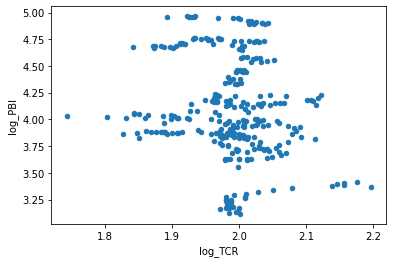

In [51]:
final.plot(kind='scatter', x='log_TCR', y='log_PBI'); # Construimos una nube de puntos para log_TCR y log_PBI

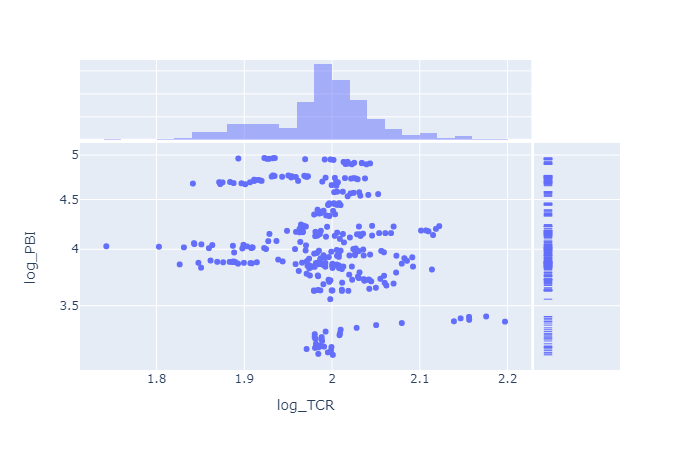

In [52]:
fig = px.scatter(final, x="log_TCR", y="log_PBI", marginal_x="histogram", marginal_y="rug",hover_name='Country Name',log_y=True)
fig.show("png")

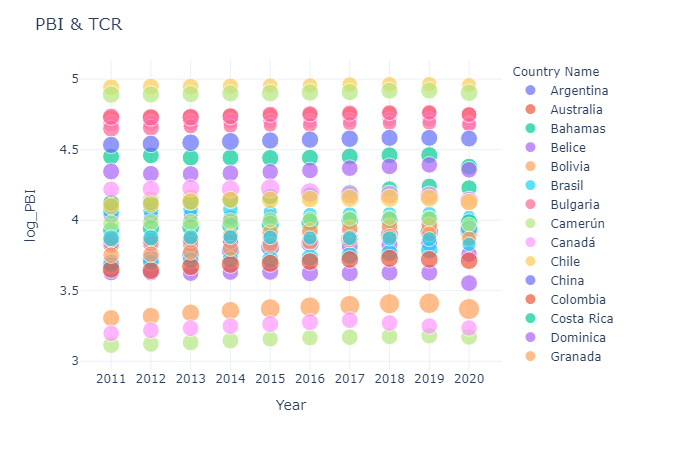

In [61]:
fig = px.scatter(final, x='Year', y='log_PBI'
                 ,size='TCR', size_max=15,
    width=1000
                 
                 ,color= 'Country Name')
fig.update_layout(template='plotly_white')
fig.update_layout(title='PBI & TCR')
fig.show("png")


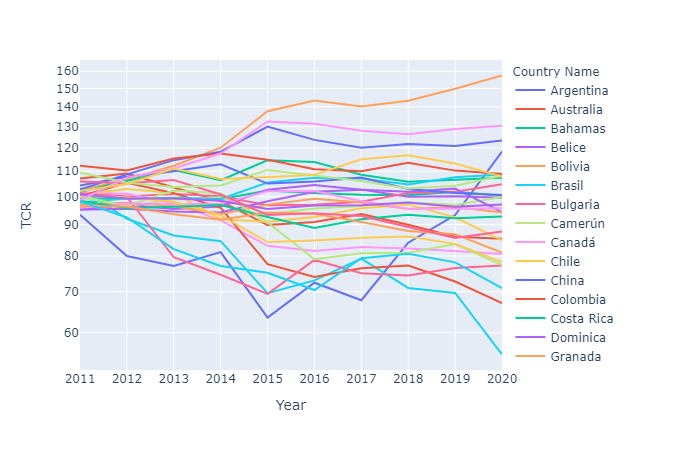

In [54]:
fig = px.line(final, x="Year", y="TCR", color='Country Name',log_y=True)
fig.show("png")

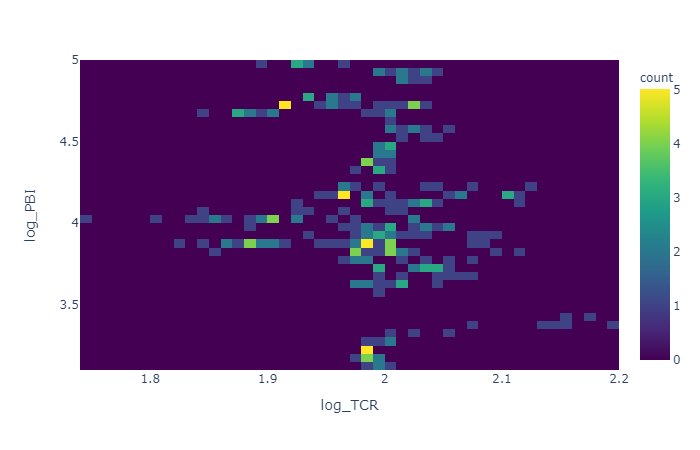

In [57]:
fig = px.density_heatmap(final, x="log_TCR", y="log_PBI",nbinsx=50, nbinsy=50, color_continuous_scale="Viridis")
fig.show("png")


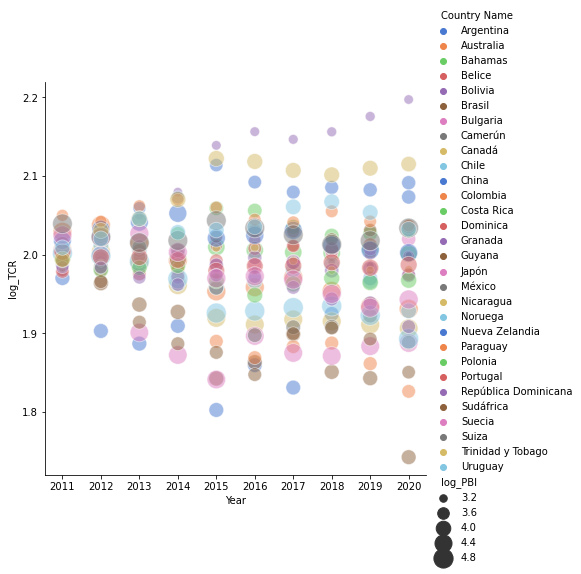

In [20]:
sns.relplot(x="Year", y="log_TCR", hue="Country Name", size="log_PBI",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=final)

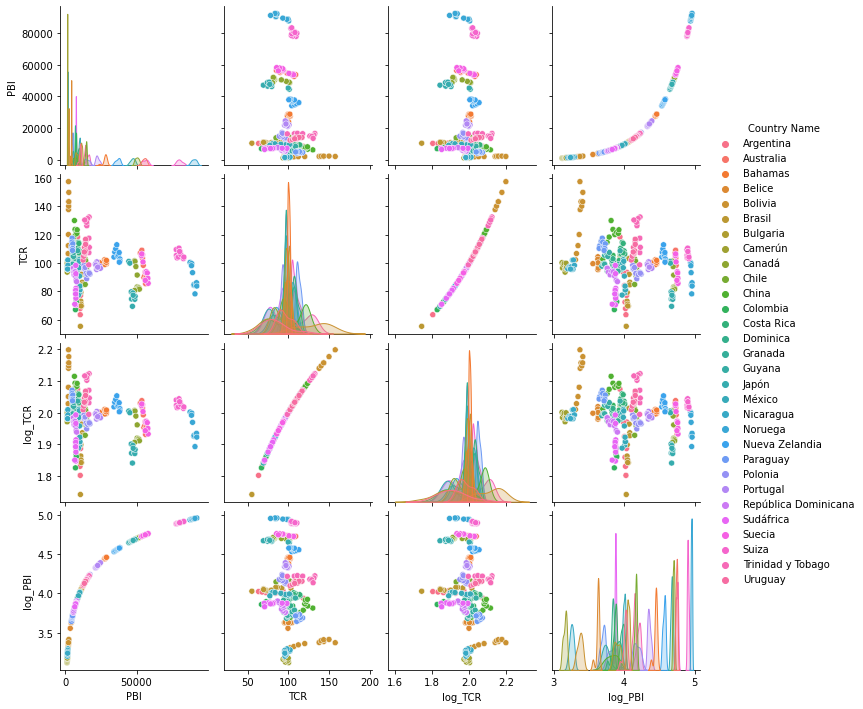

In [21]:
sns.pairplot(final, hue="Country Name")

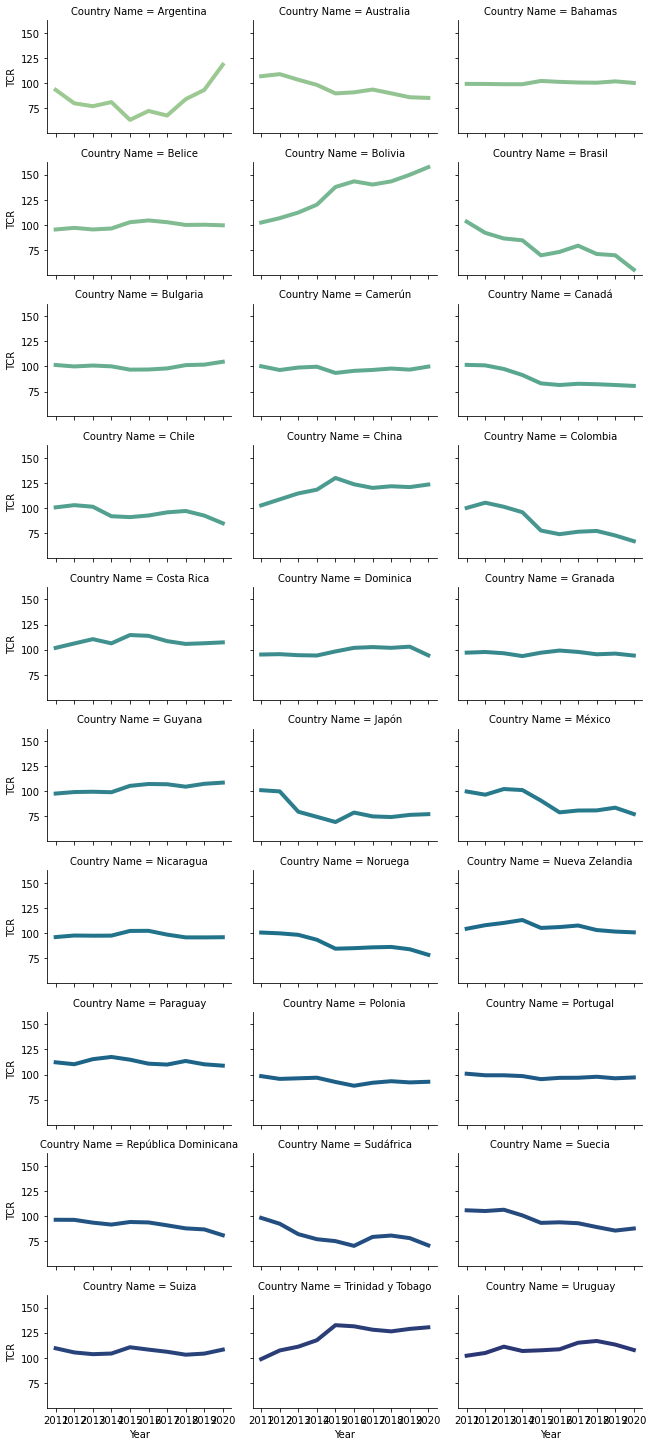

In [22]:
g = sns.relplot(
    data=final,
    x="Year", y="TCR", col="Country Name", hue="Country Name",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)


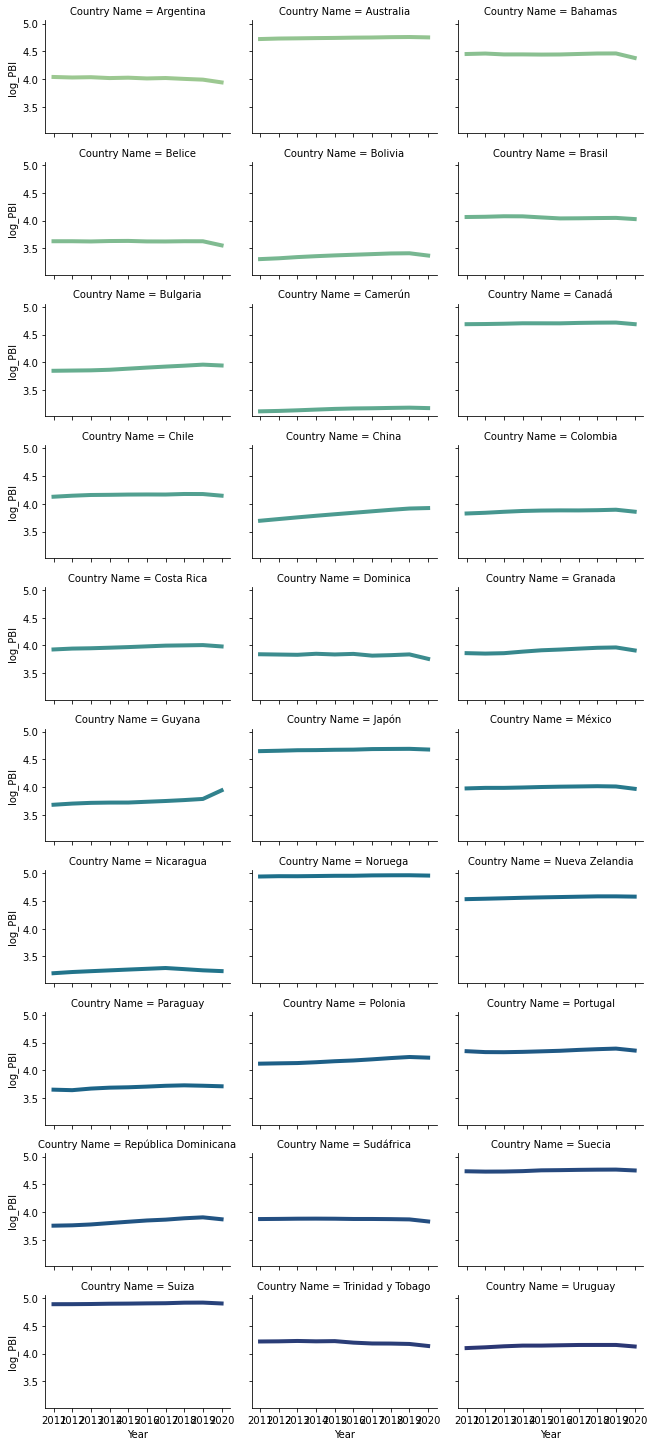

In [23]:
f = sns.relplot(
    data=final,
    x="Year", y="log_PBI", col="Country Name", hue="Country Name",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)


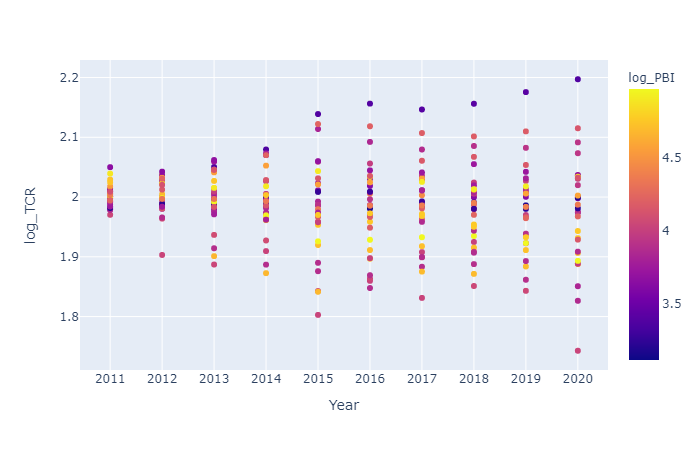

In [24]:
fig = px.scatter(final, x="Year", y="log_TCR", color='log_PBI')
fig.show('png')

In [25]:
final.to_csv('final_unificada.csv')